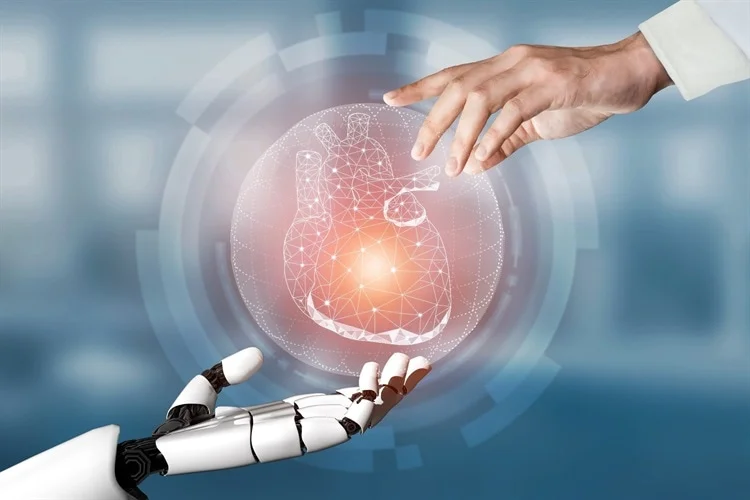

# <span style='color:green;font-size:40px'>Objective:<span/>

<span style="font-weight:bold">Developing a AIML model to predict heart attack risk based on medical records and lifestyle data and personalized prevention to help patients avoid heart attacks and achieve better health outcomes.<span/>

<span style="font-weight:bold;font-size:20px;">Importing Libraries<span/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<span style="font-weight:bold;font-size:20px;">Importing Dataset<span/>

In [2]:
df = pd.read_csv(r"heart.csv")

In [3]:
print(df.to_string())

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
0     63    1   3     145   233    1        0       150     0      2.3    0    0      1       1
1     37    1   2     130   250    0        1       187     0      3.5    0    0      2       1
2     41    0   1     130   204    0        0       172     0      1.4    2    0      2       1
3     56    1   1     120   236    0        1       178     0      0.8    2    0      2       1
4     57    0   0     120   354    0        1       163     1      0.6    2    0      2       1
5     57    1   0     140   192    0        1       148     0      0.4    1    0      1       1
6     56    0   1     140   294    0        0       153     0      1.3    1    0      2       1
7     44    1   1     120   263    0        1       173     0      0.0    2    0      3       1
8     52    1   2     172   199    1        1       162     0      0.5    2    0      3       1
9     57    1   2     150   168    0    

<span style="font-weight:bold;font-size:20px;">Understanding Dataset</span>

First:Shape of the Data

In [4]:
print("The shape of the data is ",df.shape)

The shape of the data is  (303, 14)


Preview of the first 5 rows of the data

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking the number of unique values in each column

In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

age - Age of the patient.

sex - Sex of the patient.

cp - Chest pain type:
        0 = Typical Angina:Cause by reduce blood flow to the heart(emotional stress,cold temperature),
        1 = Atypical Angina:Like a Typical Angina but have diff characteristics(eating heavy meal), 
        2 = Non-anginal Pain:Chest pain not cause by reduce blood flow to the heart,
        3 = Asymptomatic:Have some virus but not develop any symptoms.

trtbps - Resting blood pressure (in mm Hg):Measurement of blood pressure while a person is at rest.

chol - Cholestoral in mg/dl fetched via BMI sensor:produce hormones,Vitamin D,other substance that help to digest food

fbs - (fasting blood sugar > 120 mg/dl):Measurement of glucose concentration in the blood after a period of fasting.
        1 = True:fbp is greater then 120mg/dl,
        0 = False:fbp is less then 120mg/dl.

restecg - Resting electrocardiographic results:Medical test that measure the electrical activity of the heart while patient is at rest.
         0 = Normal,
         1 = ST-T wave normality,
         2 = Left ventricular hypertrophy.

thalachh - Maximum heart rate achieved during exercise.

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels:Blocks the o^2 supply.

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 
       1 = Yes(Chestpain occur due to physical activity,
       0 = No
               
output - Target variable

Separating the columns in categorical and continuous

In [8]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


Summary statistics

In [9]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Missing values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<span style="background-color: yellow;">There are no NaN values in the data.</span>

<span style="font-weight:bold;font-size:20px;">Univariate analysis :It a statistical method used to analyze a single variable in isolation.<span/>

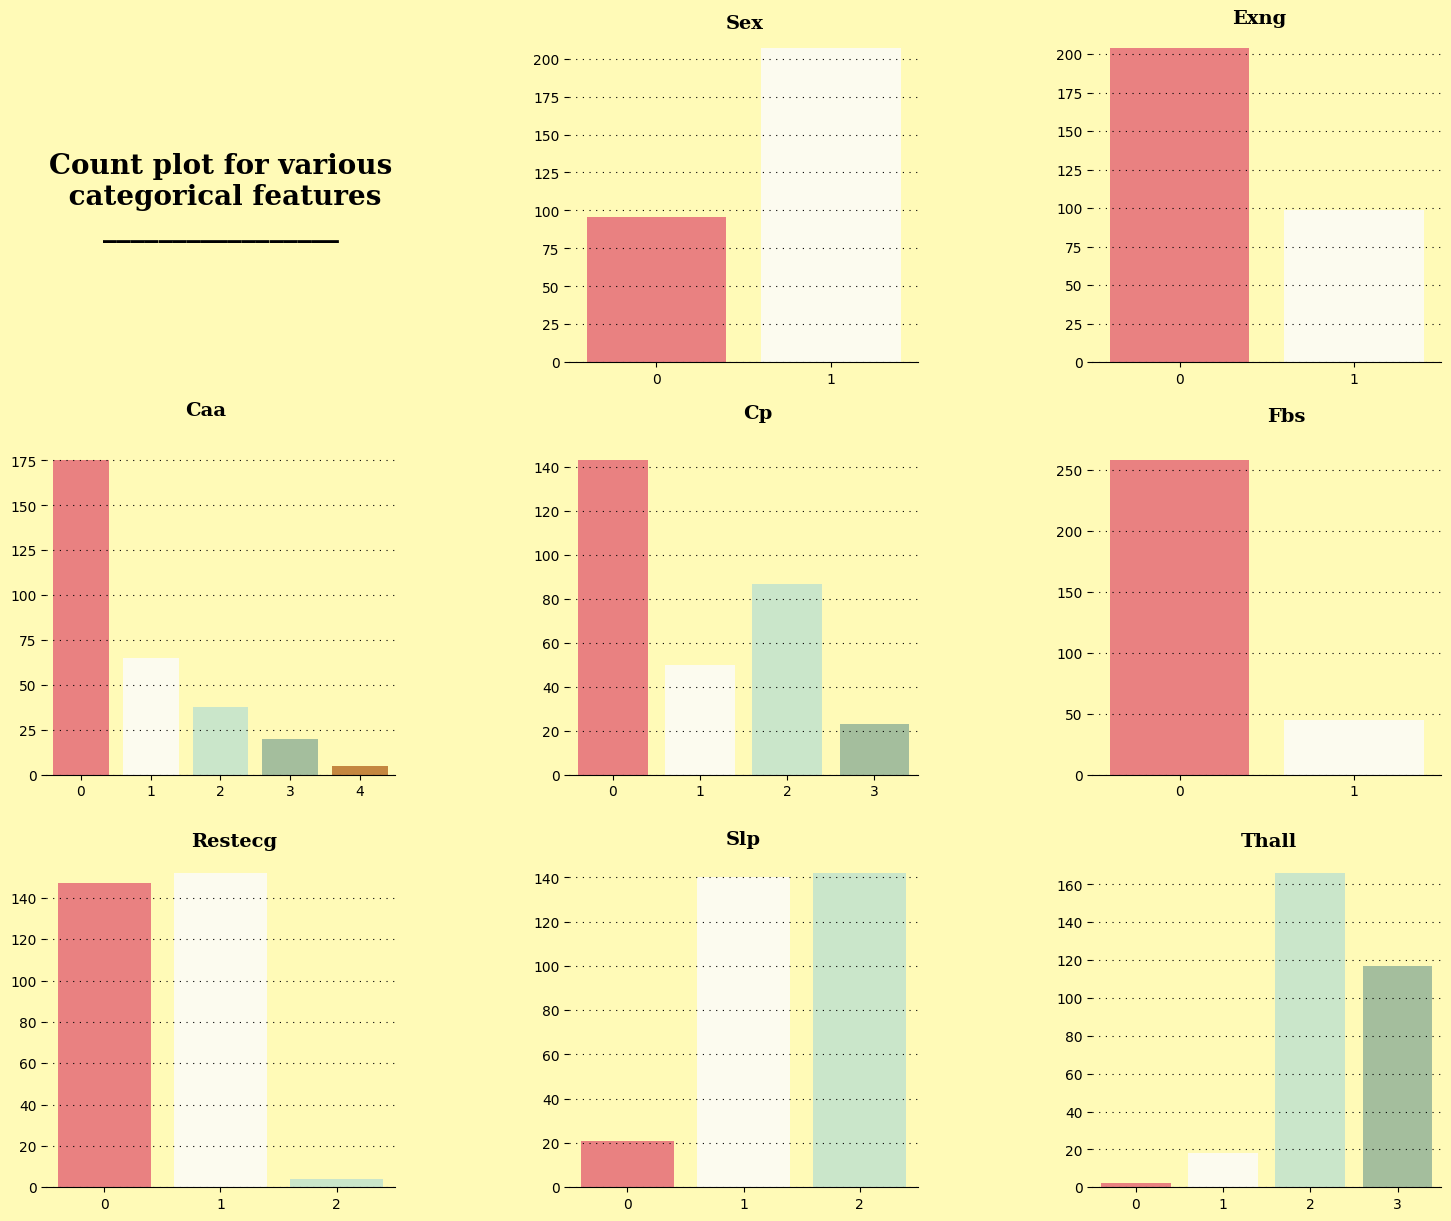

In [11]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])
background_color = "#FFFAB7"
color_palette = ["#FA7070", "#FEFDED", "#C6EBC5", "#A1C398", "#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 
# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000")
# Sex count
ax1.text(0.4, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

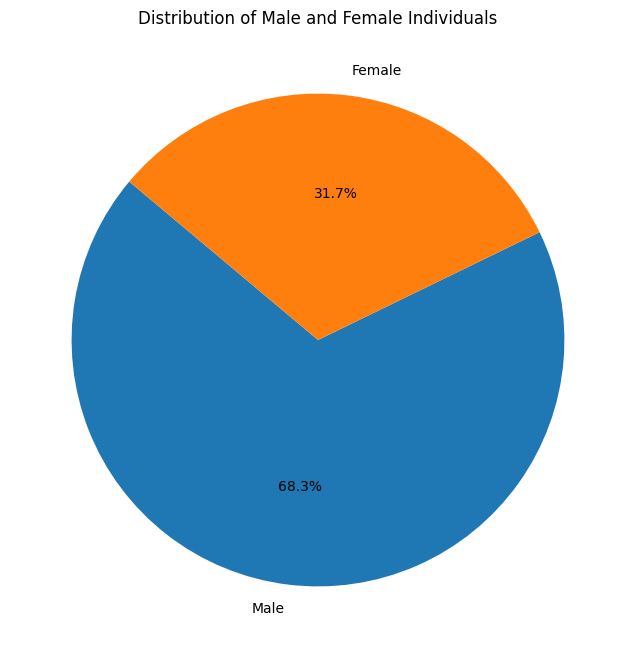

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
data = {
    'Male': df[df['sex'] == 1].shape[0],
    'Female': df[df['sex'] == 0].shape[0]
}

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Male and Female Individuals')
plt.show()


<span style="background-color: yellow;">
The data consists of more than twice the number of people with sex = 1 than sex = 0.
<span/>

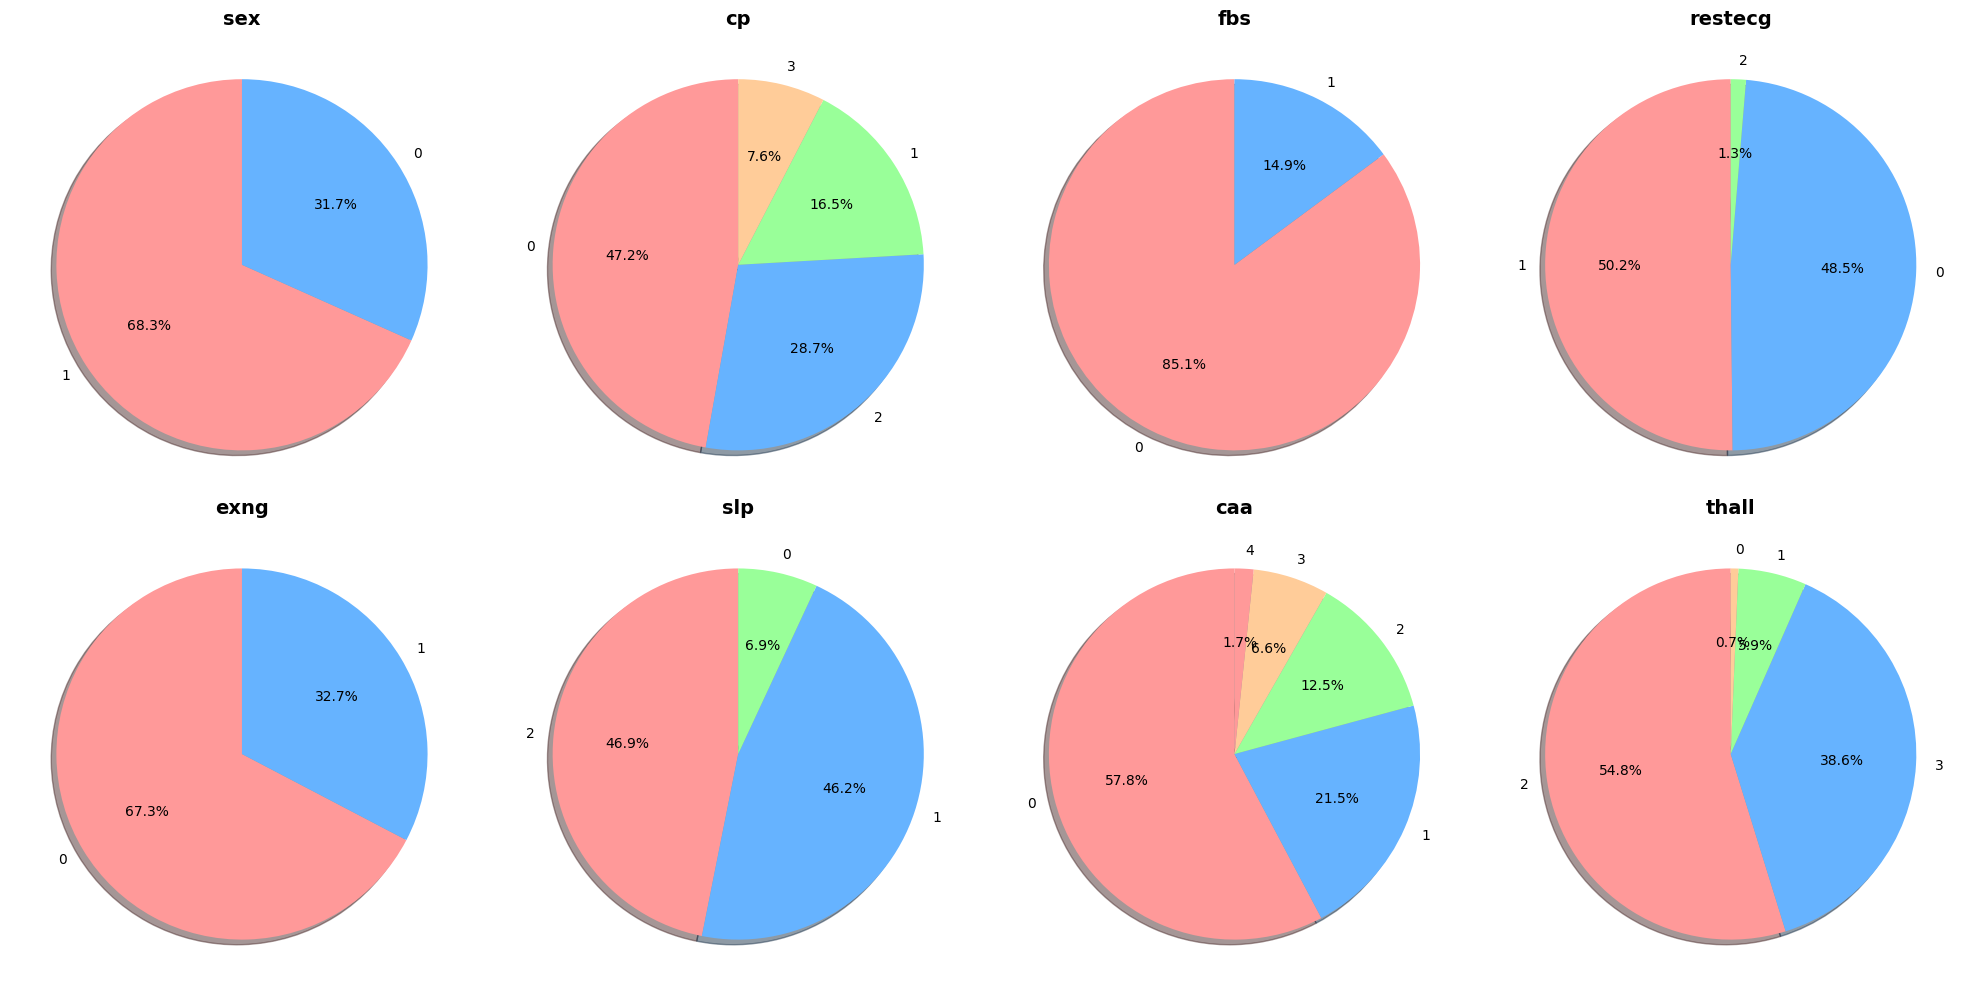

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('heart.csv')

# Define the columns for which we want to create pie charts
columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Set up subplots for pie charts
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes for easier iteration
axs = axs.flatten()

# Define custom colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Iterate over the columns and create pie charts
for i, col in enumerate(columns):
    # Calculate value counts for the current column
    counts = data[col].value_counts()
    
    # Plot the pie chart
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
    axs[i].set_title(col, fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

<span style="font-weight:bold;font-size:20px;">Di<span style="font-weight:bold;font-size:20px;">stribution Analysis<span/>

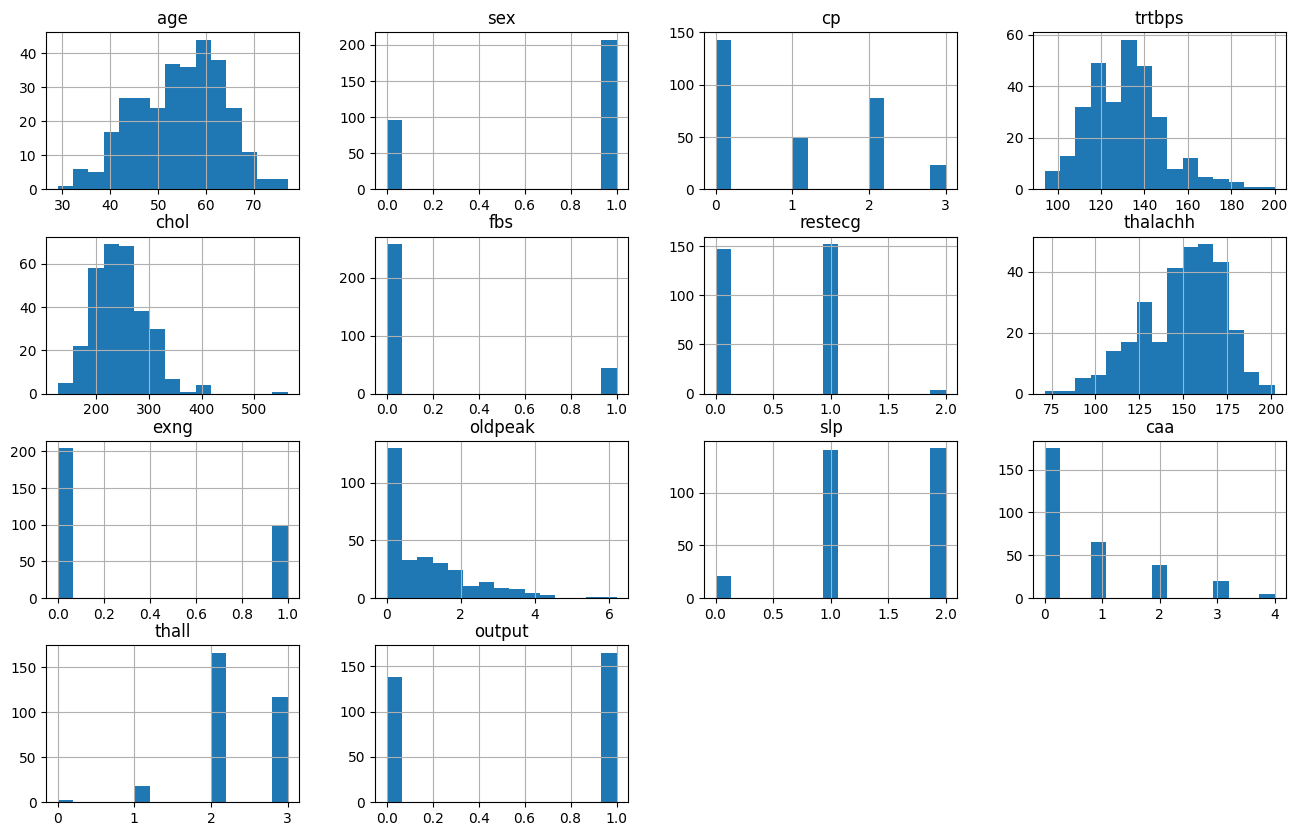

In [14]:
#visualize all features to see distributions
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(16,10)) #figsize = (width, height)
plt.show()

<span style="background-color: yellow;">
Scales for the features are different, will require feature scaling.<br/>
After visualizing the feature distributions, it's clear several numeric features are categorical (i.e. discrete)<br/>
Categorical Features: sex, cp, fbs, restecg, exng, slp, caa, thall, and output.<br/>
Continuous Features: age, trtbps, chol, thalachh, oldpeak.<br/>
<span/>

<span style="font-weight:bold;font-size:20px;">Boxen plot of continuous features<span/>

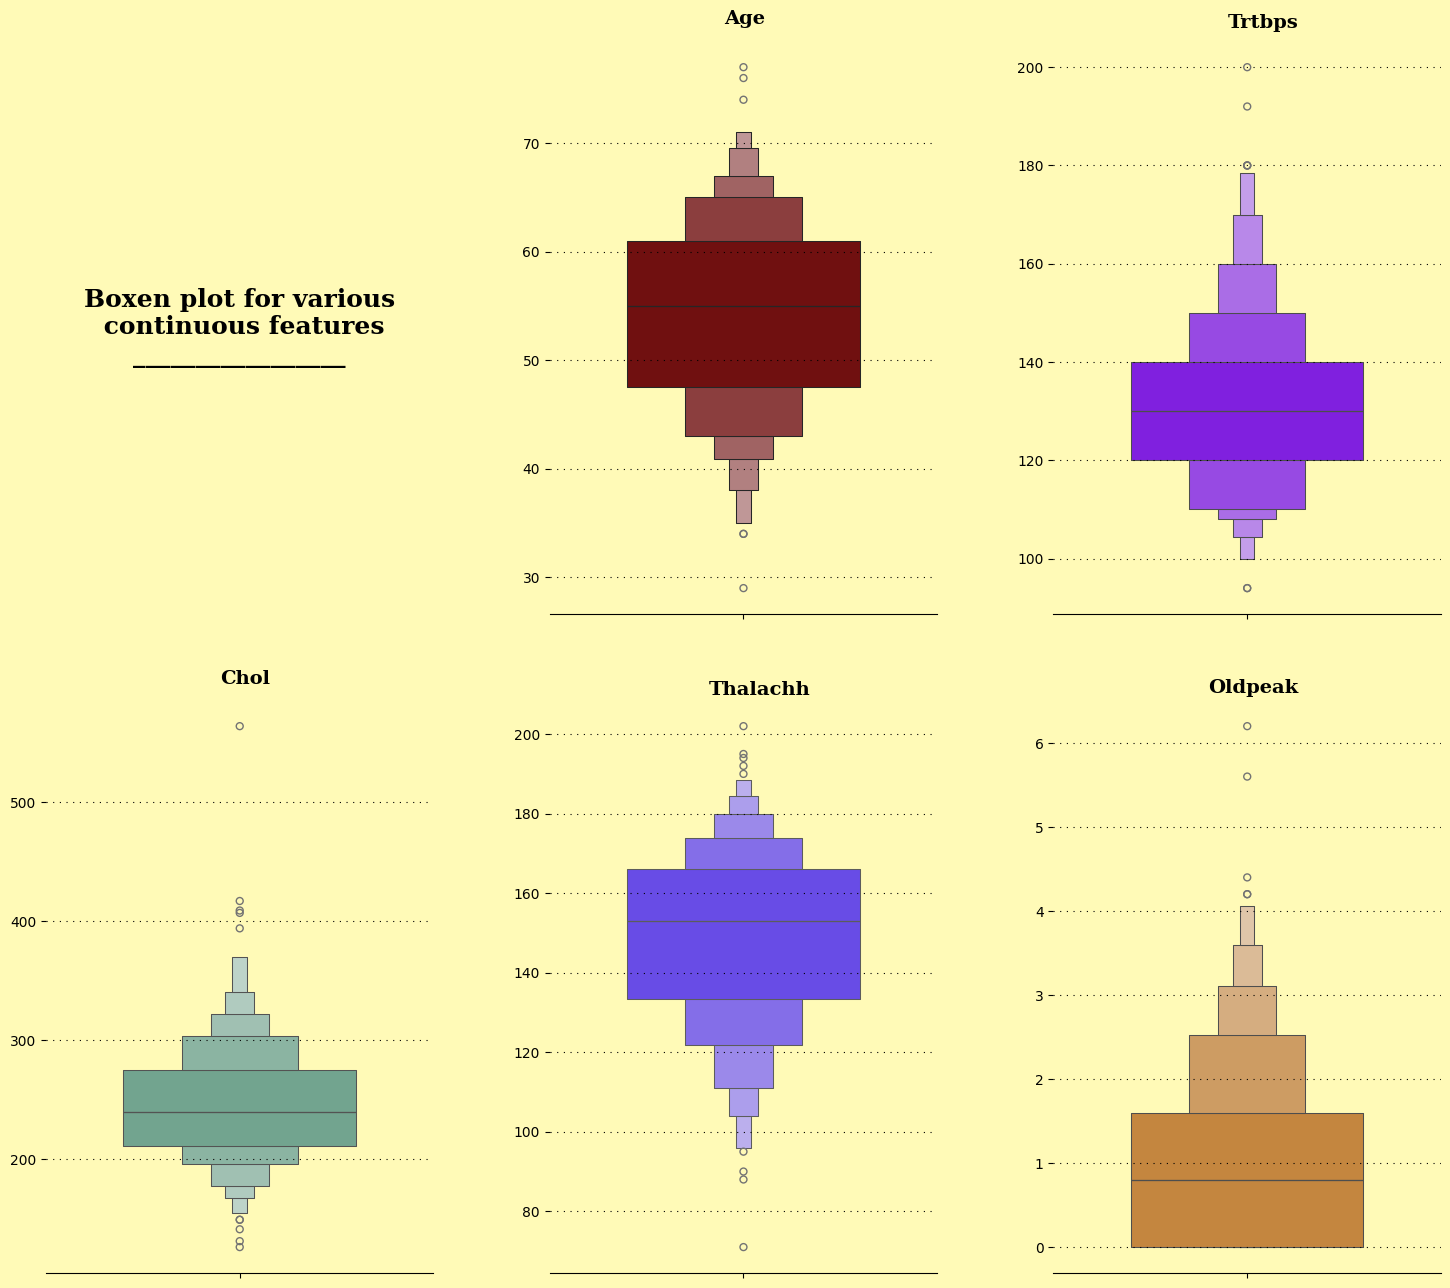

In [15]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FFFAB7"
color_palette = ["#FA7070", "#FEFDED", "#C6EBC5", "#A1C398", "#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

<span style="background-color: yellow;">There are certain outliers in all the continuous features.</span>

In [16]:
col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [17]:
for i in col_num:
    Q1 = df[i].quantile(0.25) 
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    df = df[(df[i] >= LowerBound)&(df[i] <= UpperBound)]

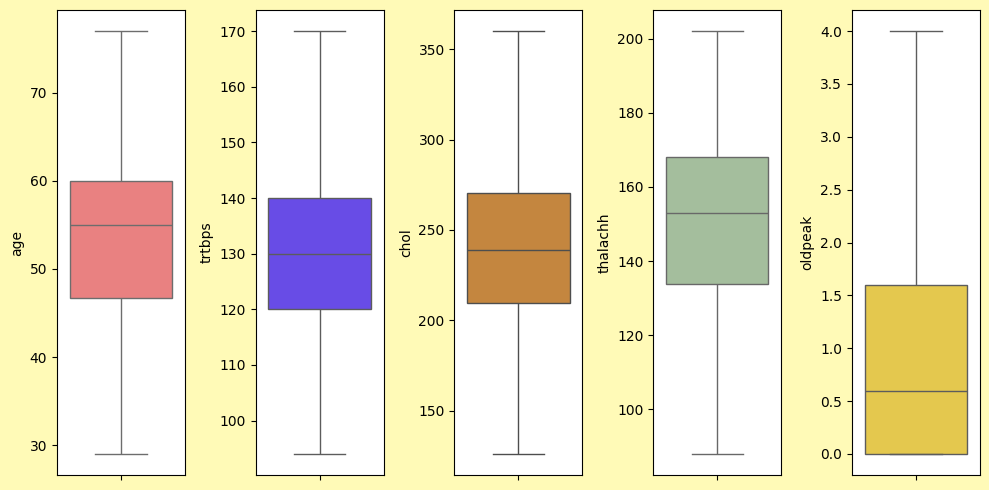

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

background_color = "#FFFAB7"
color_palette = ["#FA7070", "#5833ff","#da8829", "#A1C398", "#FDD835"]
# col_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(10, 5))
plt.gcf().set_facecolor(background_color)  # Set background color

for i in range(len(col_num)):
    plt.subplot(1, len(col_num), i + 1)
    sns.boxplot(y=df[col_num[i]], color=color_palette[i])
    plt.tight_layout()

plt.show()

<span style="background-color: yellow;">Removing outlier from continuous features.</span>

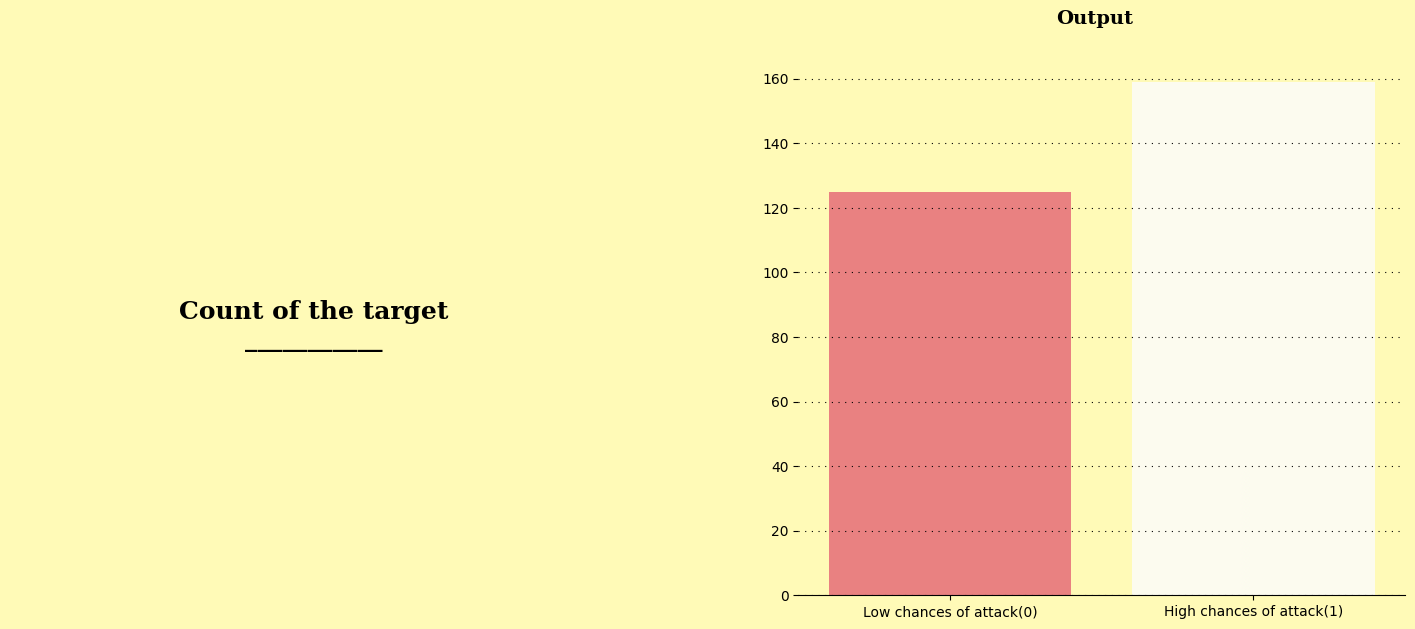

In [19]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFFAB7"
color_palette = ["#FA7070", "#FEFDED", "#C6EBC5", "#A1C398", "#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


<span style="background-color: yellow;">
Total count of low chances of attack:approx(125)<br/>
Total count of High chances of attack:159
</span>


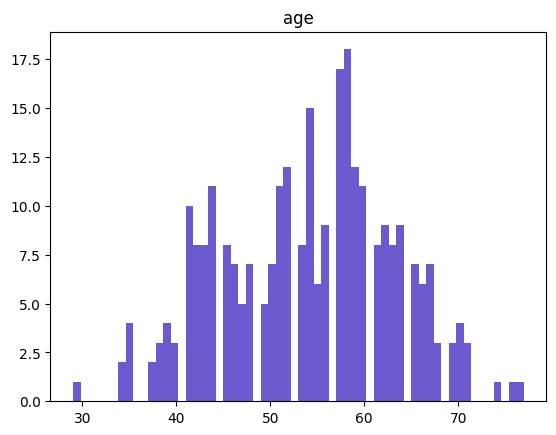

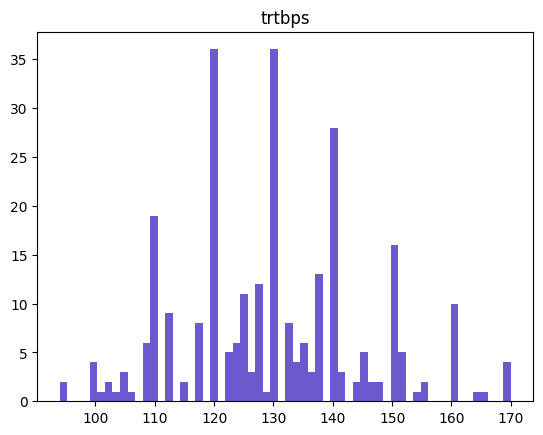

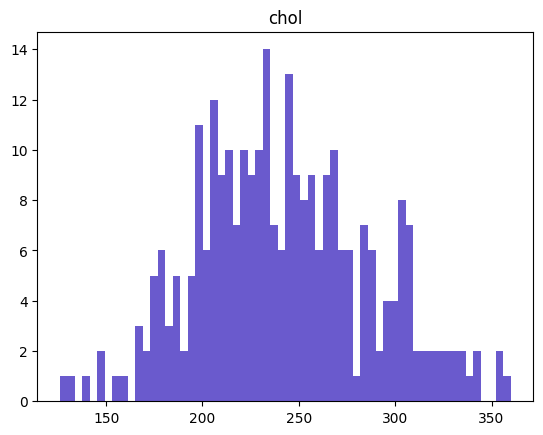

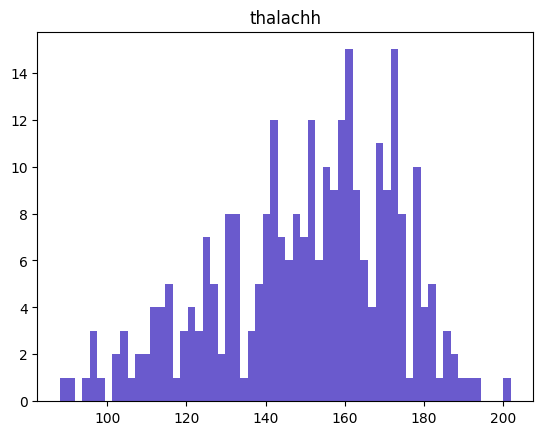

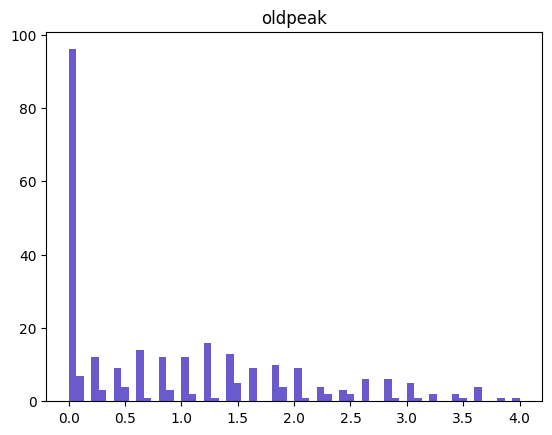

In [20]:
i = ['age', 'trtbps', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

<span style="font-weight:bold;font-size:20px;">Bivariate Analysis: It involves examining the relationship between two variables<span/>

<span style="font-weight:bold;font-size:20px;">Correlation matrix of continuous features<span/>

In [21]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.277741,0.178688,-0.414400,0.213528
trtbps,0.277741,1.000000,0.111825,-0.069547,0.142423
chol,0.178688,0.111825,1.000000,-0.025388,-0.004568
thalachh,-0.414400,-0.069547,-0.025388,1.000000,-0.343370
oldpeak,0.213528,0.142423,-0.004568,-0.343370,1.000000


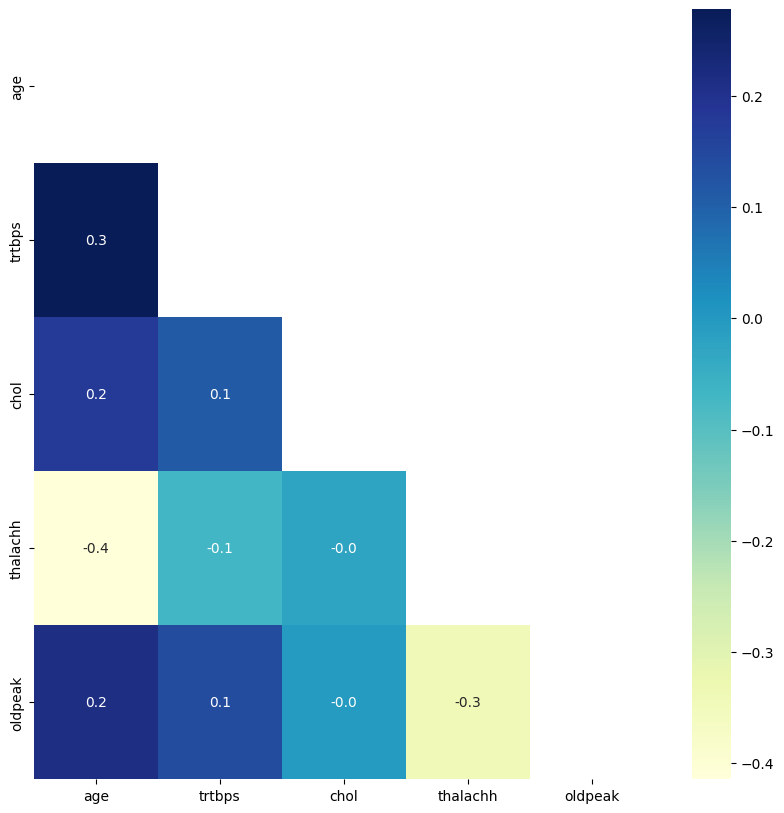

In [22]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
# ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

<span style="background-color: yellow;">
Here,thalachh(Maximum heart rate achieve during exercise) with age is negative correlated,i.e they have inversely relation.<br/>
Here.trbbps(Resting blood pressure)with age is positive correlated.i.e they have directly relation.
</span>

<span style="font-weight:bold;font-size:20px;">Correlation<span/>

In [23]:
corr = df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.067761,-0.064336,0.277741,0.178688,0.108777,-0.115474,-0.414400,0.097342,0.213528,-0.153942,0.292386,0.058585,-0.226382
sex,-0.067761,1.000000,-0.088865,0.008780,-0.126743,0.065687,-0.080962,-0.040530,0.180735,0.154856,-0.057669,0.154794,0.241863,-0.316165
cp,-0.064336,-0.088865,1.000000,0.084889,-0.085120,0.082816,0.083788,0.288116,-0.389993,-0.125400,0.098872,-0.156713,-0.180510,0.418107
trtbps,0.277741,0.008780,0.084889,1.000000,0.111825,0.126368,-0.137224,-0.069547,0.000455,0.142423,-0.081073,0.109499,-0.011922,-0.113745
chol,0.178688,-0.126743,-0.085120,0.111825,1.000000,0.015158,-0.146415,-0.025388,0.079792,-0.004568,0.034071,0.061745,0.093842,-0.109764
fbs,0.108777,0.065687,0.082816,0.126368,0.015158,1.000000,-0.078602,-0.024885,0.007048,0.016368,-0.070795,0.148502,-0.063728,-0.028433
restecg,-0.115474,-0.080962,0.083788,-0.137224,-0.146415,-0.078602,1.000000,0.092574,-0.106425,-0.092015,0.114613,-0.078471,0.033026,0.173856
thalachh,-0.414400,-0.040530,0.288116,-0.069547,-0.025388,-0.024885,0.092574,1.000000,-0.389143,-0.343370,0.378621,-0.236812,-0.114326,0.424381
exng,0.097342,0.180735,-0.389993,0.000455,0.079792,0.007048,-0.106425,-0.389143,1.000000,0.320105,-0.261445,0.123218,0.203725,-0.432780
oldpeak,0.213528,0.154856,-0.125400,0.142423,-0.004568,0.016368,-0.092015,-0.343370,0.320105,1.000000,-0.526623,0.164554,0.191045,-0.435748


<Axes: >

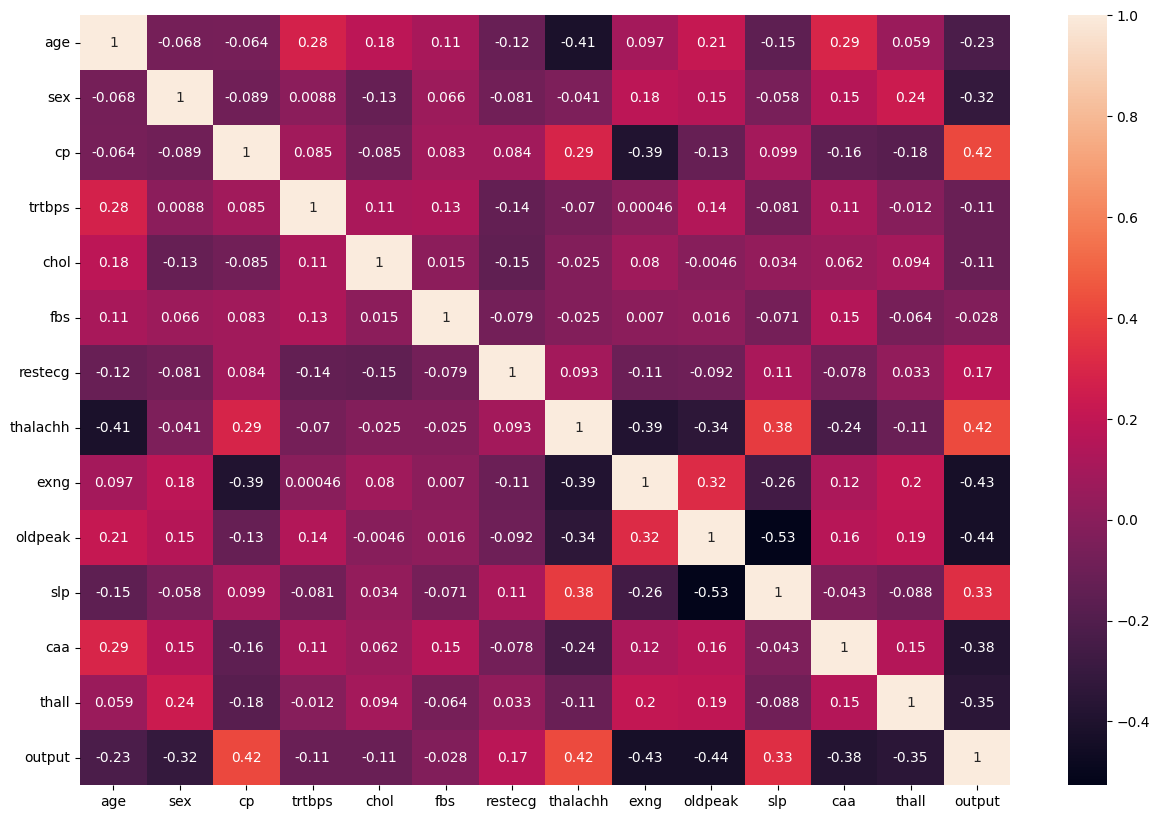

In [24]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr,annot=True)

<span style="background-color: yellow;">
Some features exhibit strong positive correlations, such as:<br/>
thalachh (maximum heart rate achieved) and output (presence of heart disease) with a correlation coefficient of 0.42.<br/>
cp (chest pain type) and output with a correlation coefficient of 0.42.<br/>
<span/>
<span style="background-color: orange;">
There are also some negative correlations, such as between thalachh and age (-0.41), indicating that as age increases, maximum heart rate achieved tends to decrease.
<span/>

<span style="font-weight:bold;font-size:20px;">Scatterplot heatmap of dataframe<span/>

<Figure size 1200x1200 with 0 Axes>

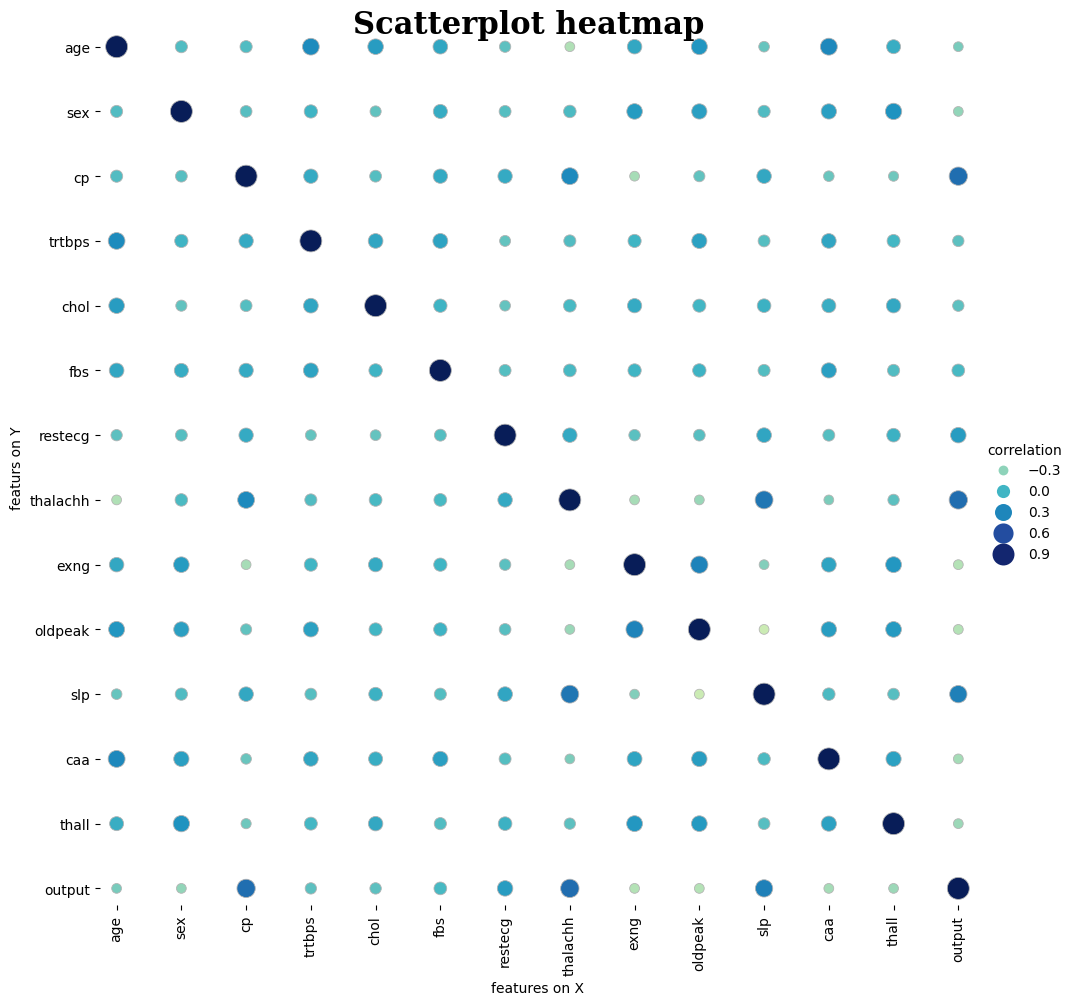

In [25]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
# for artist in g.legend.legendHandles:
#     artist.set_edgecolor(".7")
plt.show()

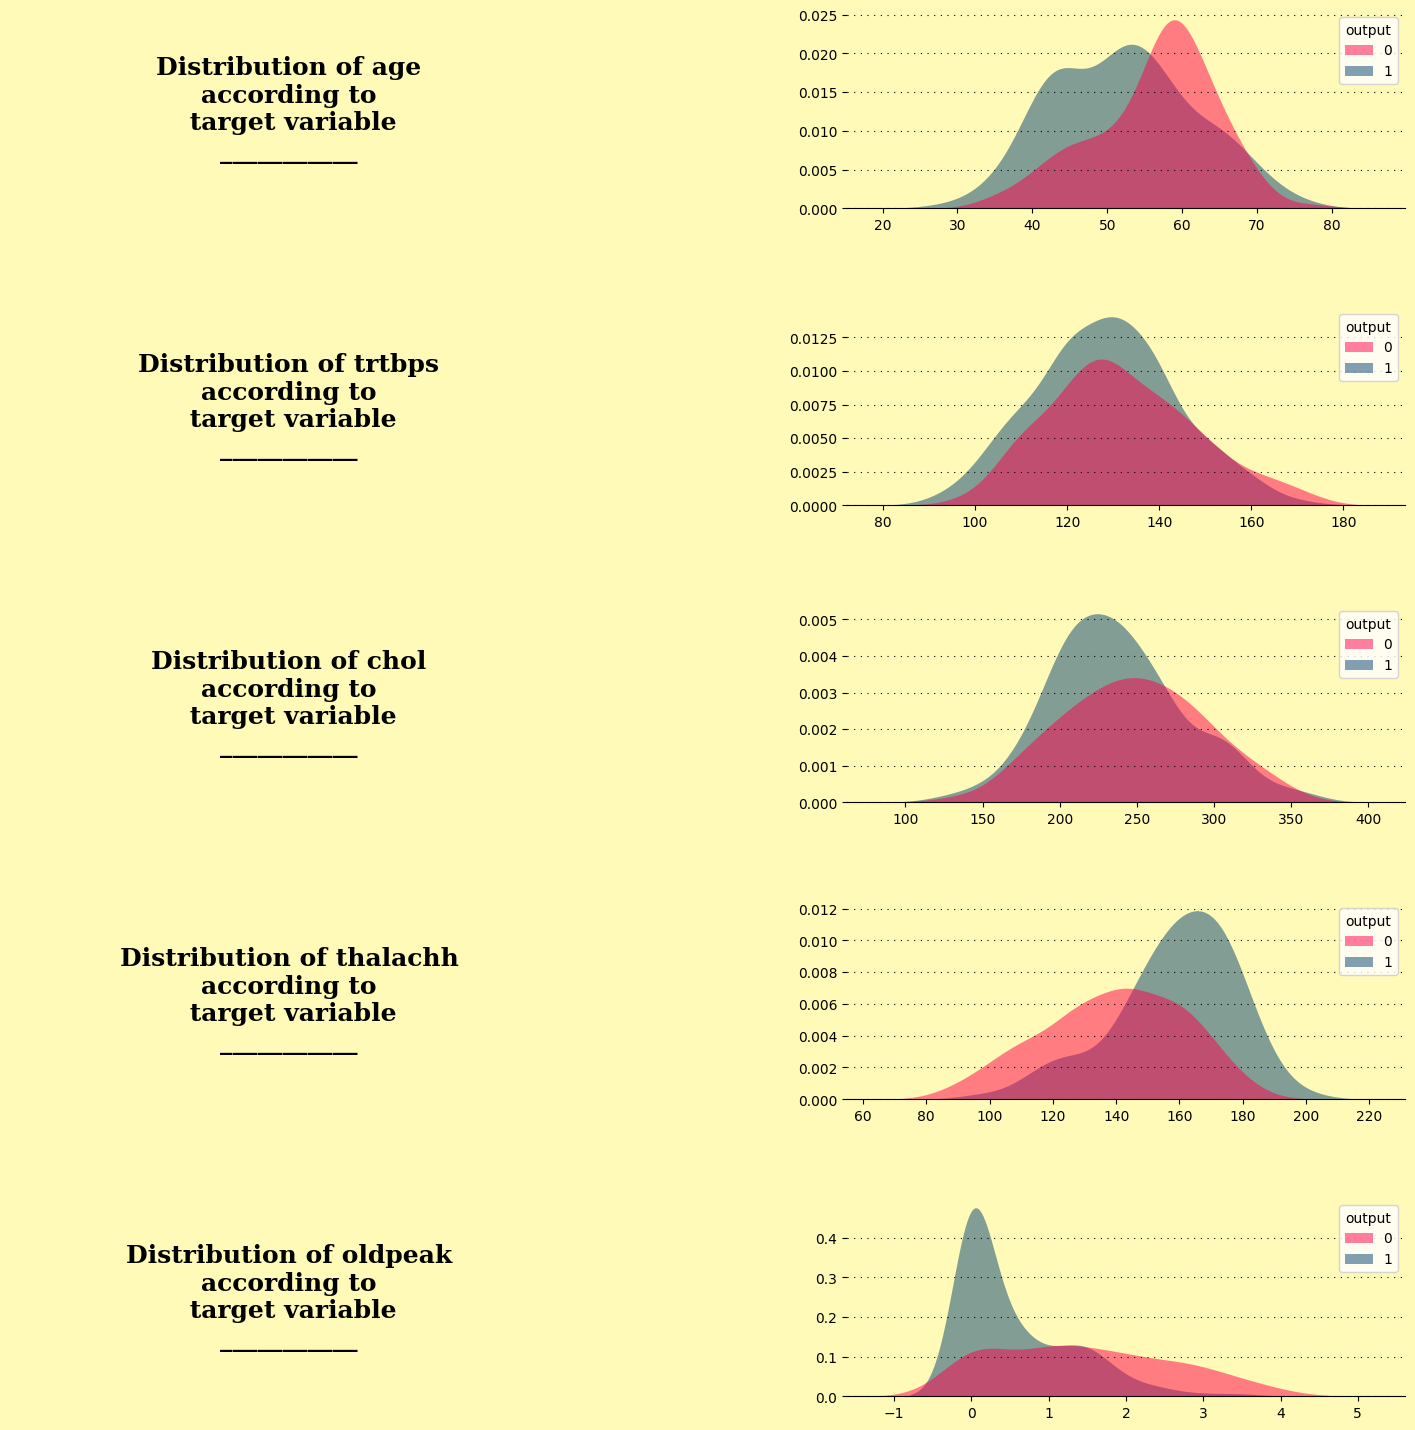

In [26]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#FFFAB7"
color_palette = ["#FA7070", "#FEFDED", "#C6EBC5", "#A1C398", "#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#FF004D","#074173"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#FF004D","#074173"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#FF004D","#074173"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#FF004D","#074173"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#FF004D","#074173"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
        ax0.spines[i].set_visible(False)
        ax1.spines[i].set_visible(False)
        ax2.spines[i].set_visible(False)
        ax3.spines[i].set_visible(False)
        ax4.spines[i].set_visible(False)
        ax5.spines[i].set_visible(False)
        ax6.spines[i].set_visible(False)
        ax7.spines[i].set_visible(False)
        ax8.spines[i].set_visible(False)
        ax9.spines[i].set_visible(False)

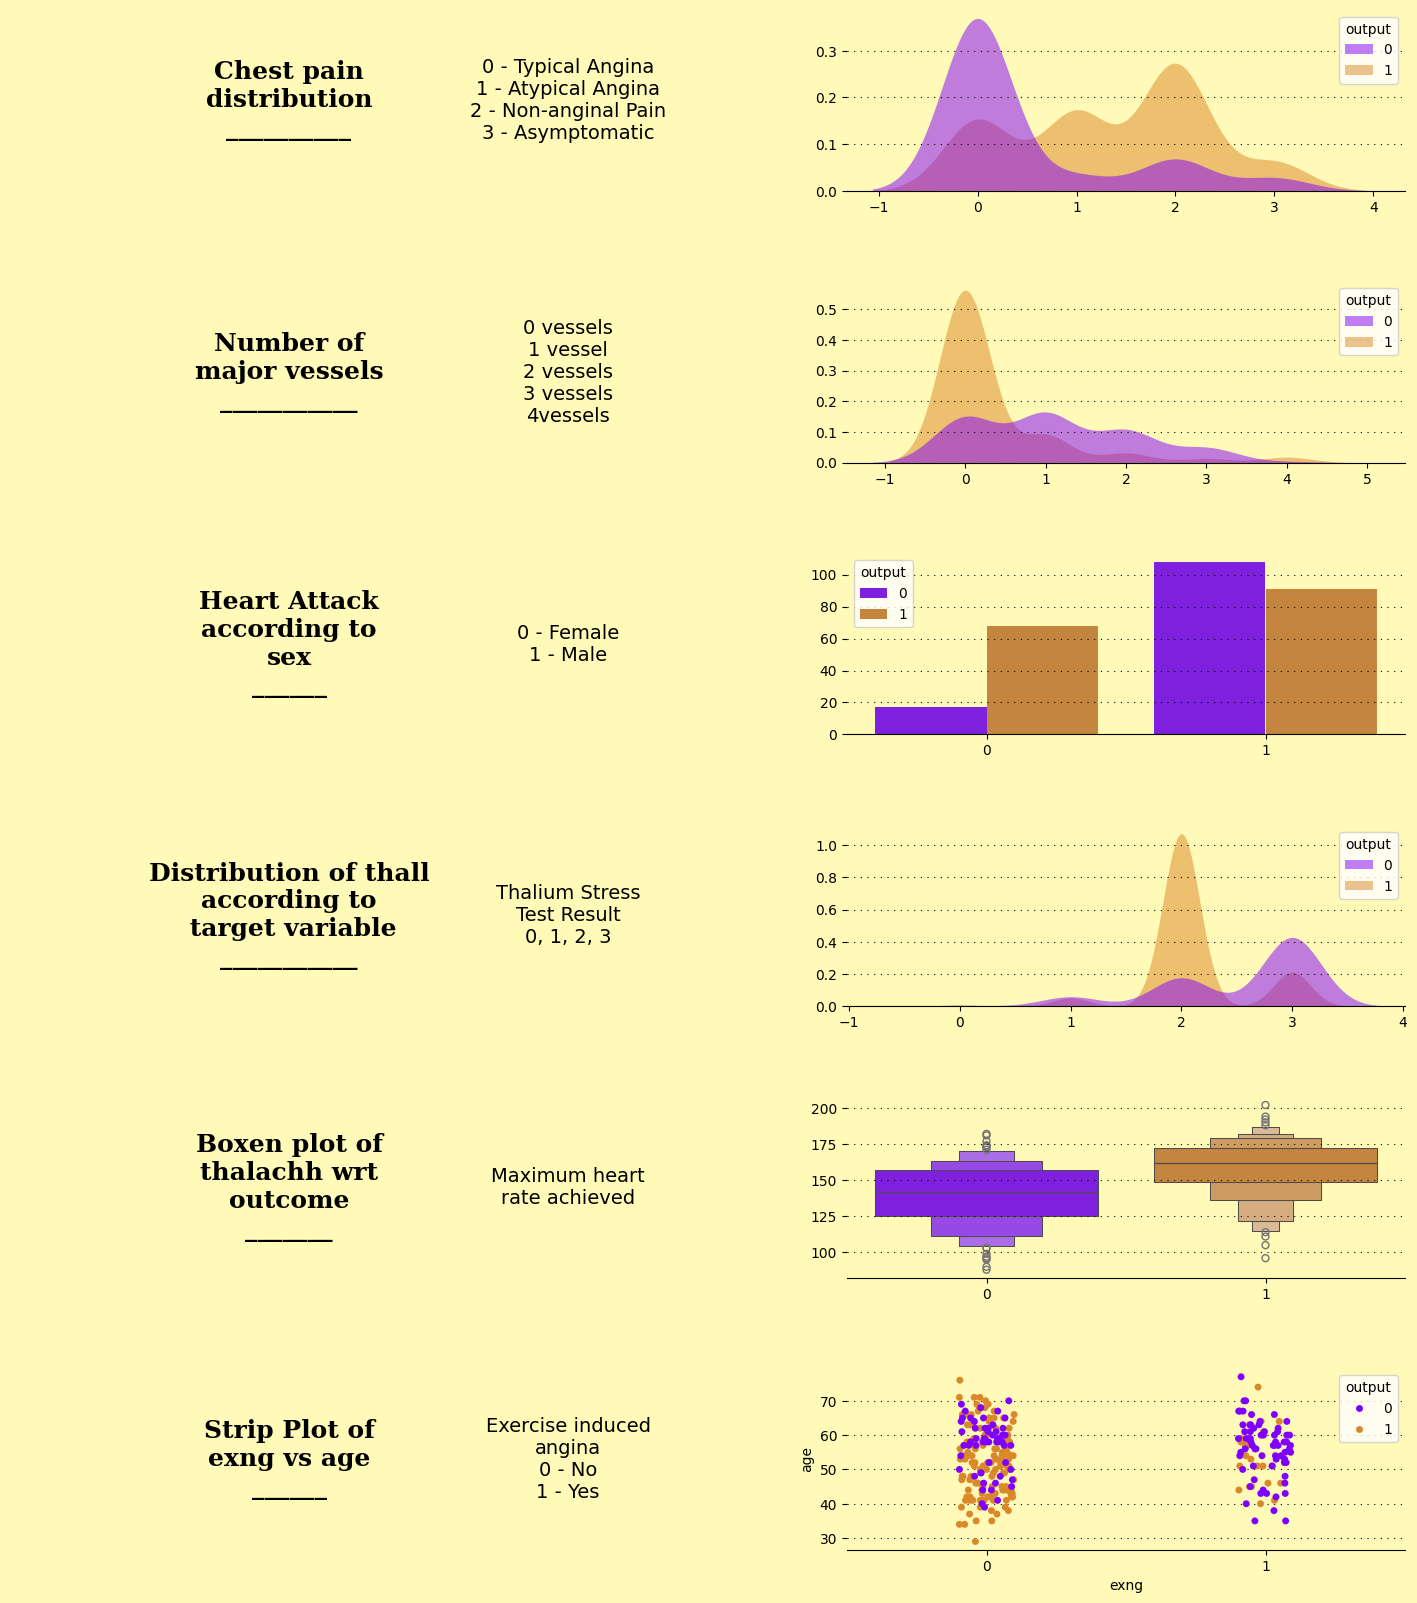

In [27]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#FFFAB7"
color_palette = ["#FA7070", "#FEFDED", "#C6EBC5", "#A1C398", "#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

Conclusions:

<span style="background-color: yellow;">
1.There are no NaN values in the data.<br/>
2.The data consists of more than twice the number of people with sex = 1 than sex = 0.<br/>
3.The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp.<br>
4.It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age wrt output, it is evident that this isn't the case.
According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.<br/>
According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.<br/>
5.Res:
People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.
People with 0 major vessels, that is with caa = 0 have high chance of heart attack.
People with sex = 1 have higher chance of heart attack.
People with thall = 2 have much higher chance of heart attack.
People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.
<span/>

<span style="font-weight:bold;font-size:20px;">Feature Scaling:<span/>

Instead of just looking at the average (or mean) and the spread (or standard deviation) of the data[standard scalar], it uses the median (the middle value) and the interquartile range (the range between the 25th and 75th percentiles) to scale the data. This means it's less likely to be thrown off by unusually large or small numbers.

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
# creating a copy of df
df1 = df

In [30]:
# define the columns to be encoded and scaled
# cat_cols = ['sex','exng','caa','cp','fbs','restecg'
#             ,'slp','thall']
# con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

In [31]:
# encoding the categorical columns  #drop_first will drop the first column of categorial column
# df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
# print(df1)

In [32]:
# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [33]:
# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.603774,1,3,0.75,-0.099174,1,0,-0.087591,0,1.0625,0,0,1
1,-1.358491,1,2,0.00,0.181818,0,1,0.992701,0,1.8125,0,0,2
2,-1.056604,0,1,0.00,-0.578512,0,0,0.554745,0,0.5000,2,0,2
3,0.075472,1,1,-0.50,-0.049587,0,1,0.729927,0,0.1250,2,0,2
4,0.150943,0,0,-0.50,1.900826,0,1,0.291971,1,0.0000,2,0,2


In [34]:
# pip install imbalanced-learn

<span style="font-weight:bold;font-size:20px;">Train and test split:
Test-20%
Training-80%<span/>

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (227, 13)
The shape of X_test is        (57, 13)
The shape of y_train is       (227, 1)
The shape of y_test is        (57, 1)


<span style="font-weight:bold;font-size:20px;">MODELING<span/>

<span style="font-weight:bold;font-size:20px;">LOGISTIC REGRESSION<span/>

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8947368421052632


<span style="font-weight:bold;font-size:20px;">SMOTE(Synthetic minority over-sampling technique)<span/>

In [37]:
from imblearn.over_sampling import SMOTE
#Initialize smote
smote=SMOTE(random_state=1)
#apply smote to data
x_resampled,y_resampled=smote.fit_resample(X_train,y_train)

In [38]:
x_resampled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.301887,1,3,0.200000,-0.578512,0,1,0.262774,0,0.125000,2,2,2
1,0.301887,1,2,1.000000,-0.446281,1,1,0.116788,0,0.625000,2,0,2
2,0.226415,0,0,-1.500000,0.148760,0,0,-0.905109,0,0.250000,1,0,2
3,0.830189,1,0,1.500000,-0.181818,0,0,-0.437956,0,1.062500,2,0,1
4,0.905660,0,0,-1.200000,-0.264463,0,1,-0.321168,0,-0.187500,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.018726,1,2,-0.924986,-0.008346,0,0,0.109628,0,0.984492,1,0,3
252,0.001681,1,0,0.087747,1.880983,0,1,-0.609561,1,0.387531,1,1,3
253,-1.169534,1,0,-0.700734,-0.526218,0,0,-0.247211,0,0.186124,1,0,3
254,-1.382440,1,0,-0.424355,0.200846,0,0,0.103968,0,-0.375000,2,0,3


In [39]:
y_resampled

,output
0,0
1,1
2,1
3,1
4,1
...,...
251,0
252,0
253,0
254,0


In [40]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [41]:
#fitting the object
logreg.fit(x_resampled,y_resampled)

LogisticRegression()

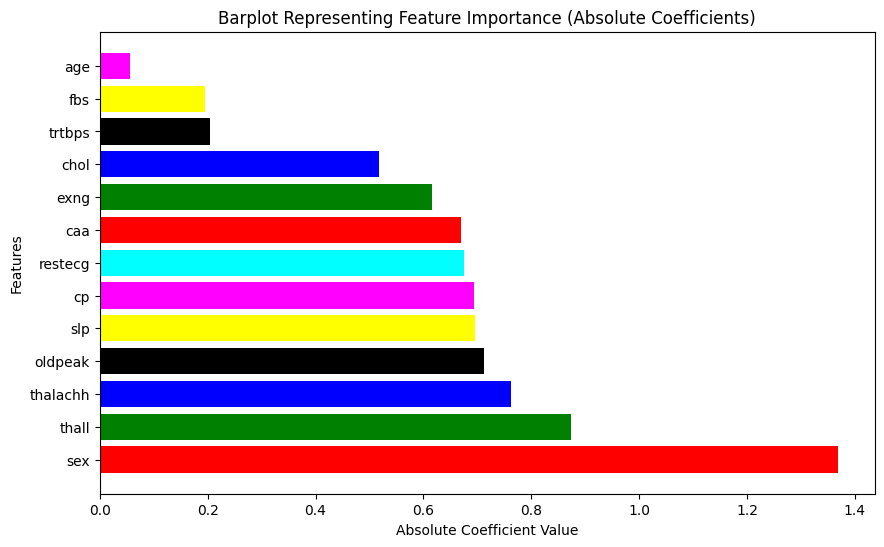

In [42]:
# Get feature names from your dataset
feature_names = x_resampled.columns

# Extract coefficients and their absolute values
coefficients = logreg.coef_[0]
absolute_coefficients = np.abs(coefficients)

# Create a DataFrame with feature names and their absolute coefficients
imp_feature = pd.DataFrame({'Feature': feature_names, 'Coefficient': absolute_coefficients})

# Sort features by absolute coefficient value to get a clearer visualization
imp_feature = imp_feature.sort_values(by='Coefficient', ascending=False)

# Define colors for the bar plot
colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan']

# Plotting the coefficients
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(imp_feature['Feature'], imp_feature['Coefficient'], color=colors)
plt.title("Barplot Representing Feature Importance (Absolute Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.show()

In [43]:
# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.37664518, 0.62335482],
       [0.75749995, 0.24250005],
       [0.36907067, 0.63092933],
       [0.99335131, 0.00664869],
       [0.20071623, 0.79928377],
       [0.91235795, 0.08764205],
       [0.17520459, 0.82479541],
       [0.86794099, 0.13205901],
       [0.18618572, 0.81381428],
       [0.87636587, 0.12363413],
       [0.01505049, 0.98494951],
       [0.9441929 , 0.0558071 ],
       [0.05950273, 0.94049727],
       [0.98838958, 0.01161042],
       [0.23383365, 0.76616635],
       [0.48500169, 0.51499831],
       [0.88994581, 0.11005419],
       [0.09911957, 0.90088043],
       [0.32172947, 0.67827053],
       [0.27553634, 0.72446366],
       [0.01267634, 0.98732366],
       [0.01866107, 0.98133893],
       [0.56078693, 0.43921307],
       [0.83341985, 0.16658015],
       [0.03275884, 0.96724116],
       [0.83425482, 0.16574518],
       [0.61501825, 0.38498175],
       [0.71840275, 0.28159725],
       [0.55646072, 0.44353928],
       [0.17793511, 0.82206489],
       [0.

In [44]:
# finding the predicted valued:argmax= argument of the maximum  is used to find the index of the maximum value in an array or sequence.
y_pred = np.argmax(y_pred_proba,axis=1)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [45]:
# printing the test accuracy
from sklearn.metrics import accuracy_score
res1=accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8596491228070176


In [46]:
# import pickle
# filename = "heart_model.sav"
# pickle.dump(logreg,open(filename,"wb"))

In [47]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  3],
       [ 5, 26]], dtype=int64)

 The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 24 and 26 are actual predictions, and 2 and 5 are incorrect predictions.

Text(0.5, 427.9555555555555, 'Predicted label')

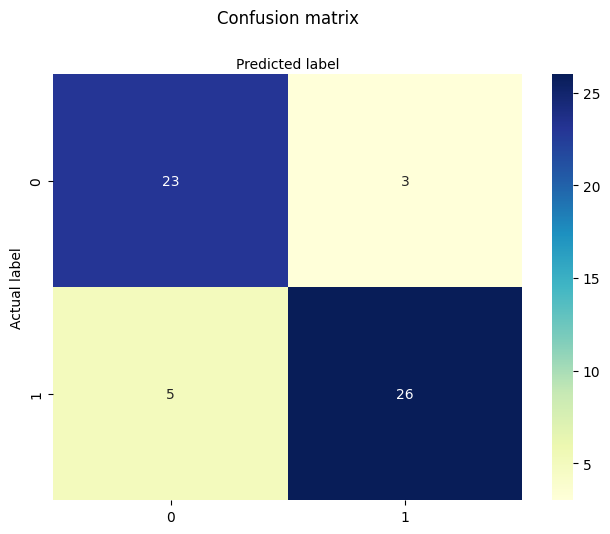

In [48]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

True Positives (TP): The number of instances correctly predicted as positive:26
True Negatives (TN): The number of instances correctly predicted as negative:25 

In [49]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85        26
         Yes       0.90      0.84      0.87        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



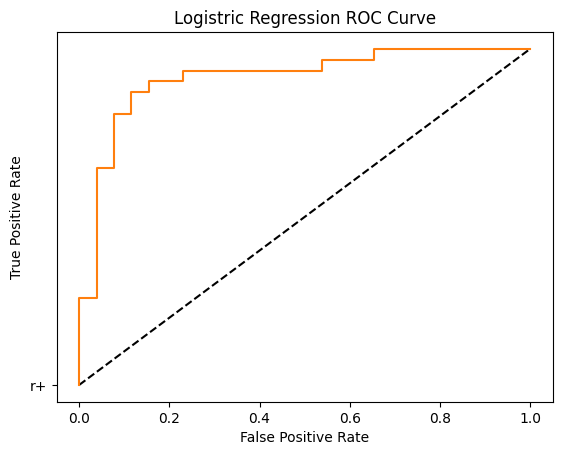

In [50]:
from sklearn.metrics import  roc_curve
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

<span style="font-weight:bold;font-size:20px;">SUPPORT VECTOR MACHINE<span/>


In [51]:
from sklearn.svm import SVC
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=2).fit(x_resampled,y_resampled)

# predicting the values
y_pred = clf.predict(X_test)

res2=accuracy_score(y_test, y_pred)
# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.9122807017543859


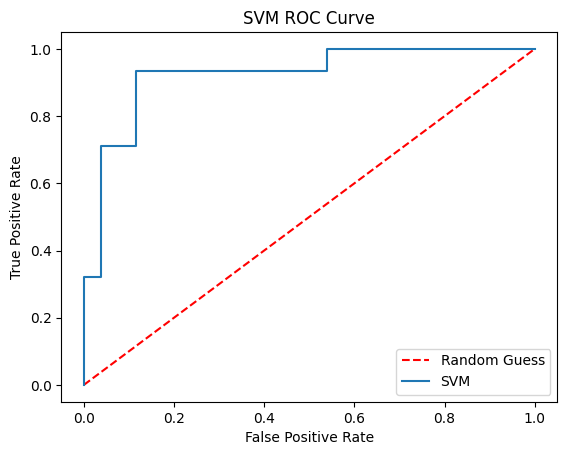

In [71]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate decision scores
decision_scores = clf.decision_function(X_test)

# Convert decision scores to probabilities using Platt scaling
y_pred_prob = 1 / (1 + np.exp(-decision_scores))

# Instantiate the roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the curve
plt.plot([0,1], [0,1], "k--", color='red', label='Random Guess')
plt.plot(fpr, tpr, label='SVM')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()



In [52]:
import pickle
filename = "heart_model_final.sav"
pickle.dump(logreg,open(filename,"wb"))

In [53]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  3],
       [ 2, 29]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

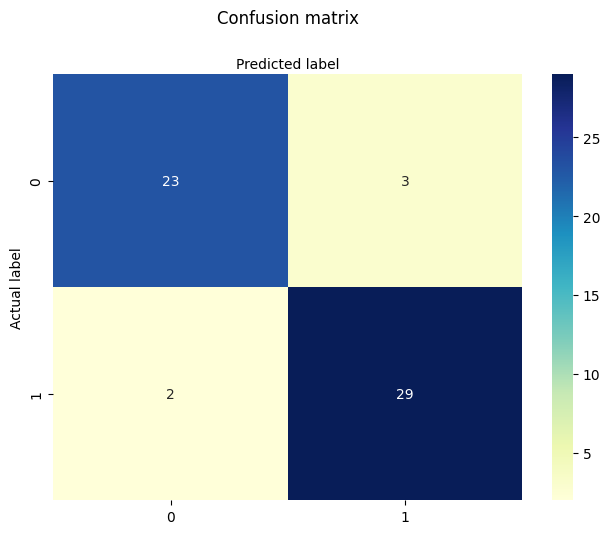

In [54]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

DECISION TREE 

In [55]:
from sklearn.tree import DecisionTreeClassifier
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(x_resampled,y_resampled)

# calculating the predictions
y_pred = dt.predict(X_test)

res3=accuracy_score(y_test, y_pred)
# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))


The test accuracy score of Decision Tree is  0.6842105263157895


In [56]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[17,  9],
       [ 9, 22]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

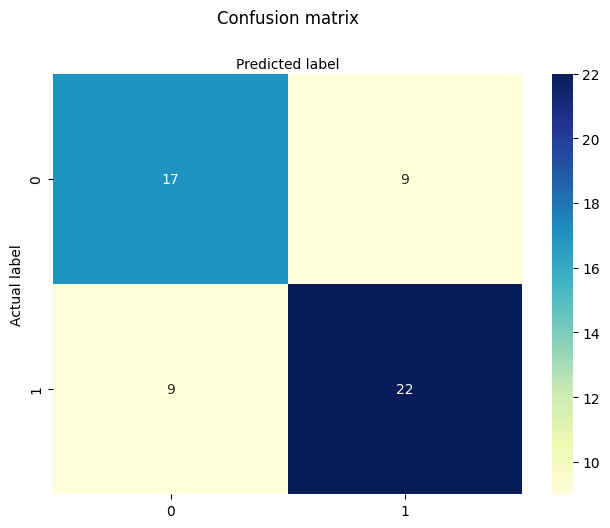

In [57]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_resampled,y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(x_resampled,y_resampled)

# Make predictions
y_pred = best_rf.predict(X_test)


res4=accuracy_score(y_test, y_pred)
# Print the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
The test accuracy score of Random Forest is  0.8421052631578947


In [59]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  3],
       [ 6, 25]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

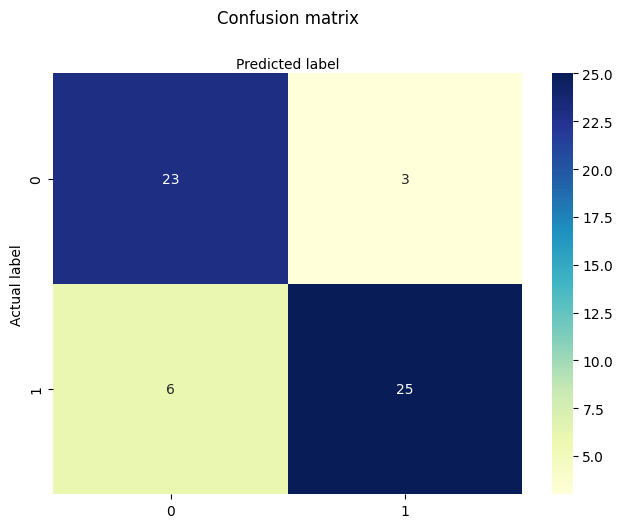

In [60]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

Gradient Boosting Classifier - without tuning 

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(x_resampled,y_resampled)

res5=accuracy_score(y_test, y_pred)
# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.8596491228070176


In [62]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25,  1],
       [ 7, 24]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

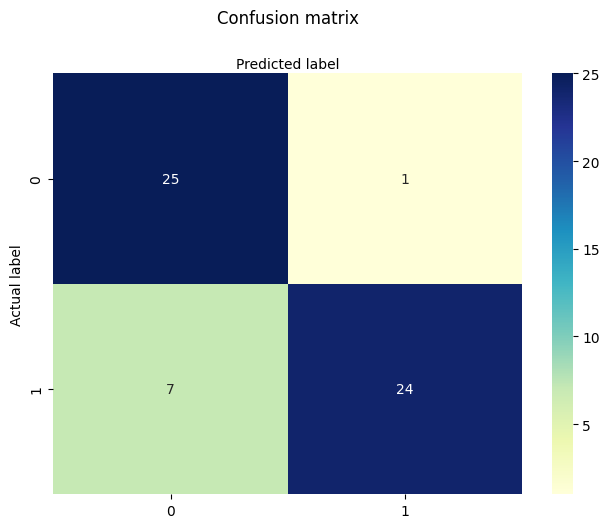

In [63]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

<span style="font-weight:bold;font-size:20px;">MODEL EVALUATION<span/>

In [64]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','Decision Tree','Random Forest','Gradient Boost'], 'Accuracy': [
                    res1*100,res2*100,res3*100,res4*100,res5*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.964912
1,Support Vector Machine,91.228070
2,Decision Tree,68.421053
3,Random Forest,84.210526
4,Gradient Boost,84.210526


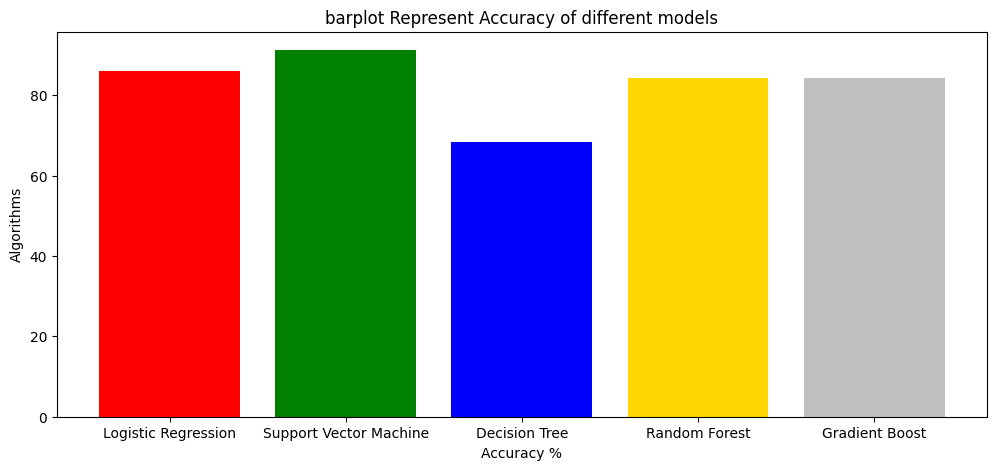

In [65]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

<span style="font-weight:bold;font-size:20px;">CONCLUSION:<span/>

1) SVM gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.